In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
project_name='food-101-cnn'

In [3]:
data_dir = './data/food-101'

print(os.listdir(data_dir))

['classes.txt', 'h5', 'images', 'labels.txt', 'test.json', 'test.txt', 'train.json', 'train.txt']


In [4]:
import os

# Directory paths
train_dir = 'train'
test_dir = 'test'

# Function to count samples in a directory
def count_samples(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

# Count samples in train and test directories
train_samples = count_samples(train_dir)
test_samples = count_samples(test_dir)

print("# of samples in train:", train_samples)
print("# of samples in test:", test_samples)


# of samples in train: 75750
# of samples in test: 25250


In [5]:
apple_pie_files = os.listdir("./train/apple_pie")
print('No. of training examples for airplanes:', len(apple_pie_files))
print(apple_pie_files[:5])

No. of training examples for airplanes: 750
['1005649.jpg', '1014775.jpg', '1026328.jpg', '1028787.jpg', '1043283.jpg']


In [6]:
cannoli_test_files = os.listdir("./test/cannoli")
print("No. of test examples for ship:", len(cannoli_test_files))
print(cannoli_test_files[:5])

No. of test examples for ship: 250
['1087676.jpg', '109727.jpg', '1102569.jpg', '1118168.jpg', '1127495.jpg']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset = ImageFolder('./train', transform=ToTensor())

In [9]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.2471, 0.3216, 0.3804,  ..., 0.2039, 0.1922, 0.1843],
         [0.4745, 0.4314, 0.4196,  ..., 0.2902, 0.2510, 0.2235],
         [0.4235, 0.3373, 0.2784,  ..., 0.3647, 0.3020, 0.2549],
         ...,
         [0.3020, 0.2902, 0.2784,  ..., 0.1843, 0.2549, 0.3020],
         [0.2588, 0.2549, 0.2510,  ..., 0.2745, 0.2314, 0.1765],
         [0.2471, 0.2510, 0.2431,  ..., 0.1882, 0.2000, 0.2039]],

        [[0.2000, 0.2745, 0.3412,  ..., 0.2000, 0.1922, 0.1843],
         [0.4157, 0.3843, 0.3765,  ..., 0.2863, 0.2471, 0.2235],
         [0.3647, 0.2863, 0.2275,  ..., 0.3608, 0.2980, 0.2510],
         ...,
         [0.2706, 0.2588, 0.2471,  ..., 0.1647, 0.2314, 0.2784],
         [0.2235, 0.2196, 0.2078,  ..., 0.2588, 0.2118, 0.1569],
         [0.2078, 0.2157, 0.2000,  ..., 0.1686, 0.1804, 0.1843]],

        [[0.2157, 0.2824, 0.3373,  ..., 0.1843, 0.1843, 0.1765],
         [0.4275, 0.3843, 0.3686,  ..., 0.2706, 0.2392, 0.2157],
         [0.3529, 0.2627, 0.1961,  ..., 0.3451, 0.2824, 0.

In [10]:
print(dataset.classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [12]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  apple_pie (0)


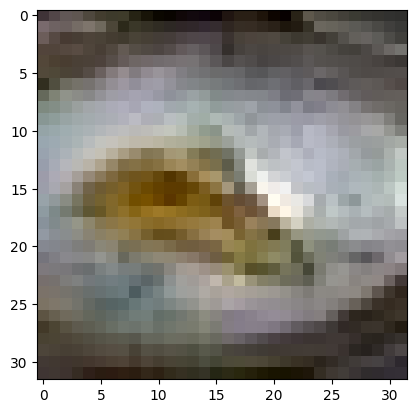

In [13]:
show_example(*dataset[0])

Label:  baby_back_ribs (1)


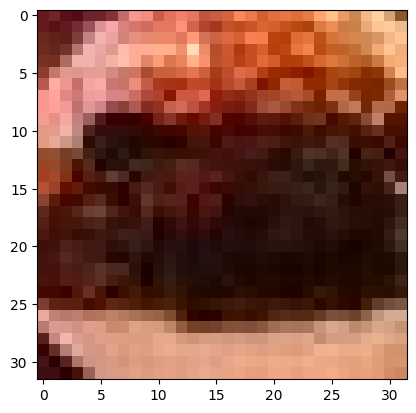

In [14]:
show_example(*dataset[1099])

In [15]:
random_seed = 150
torch.manual_seed(random_seed);

In [16]:
val_size = 100000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(51500, 24250)

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [18]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

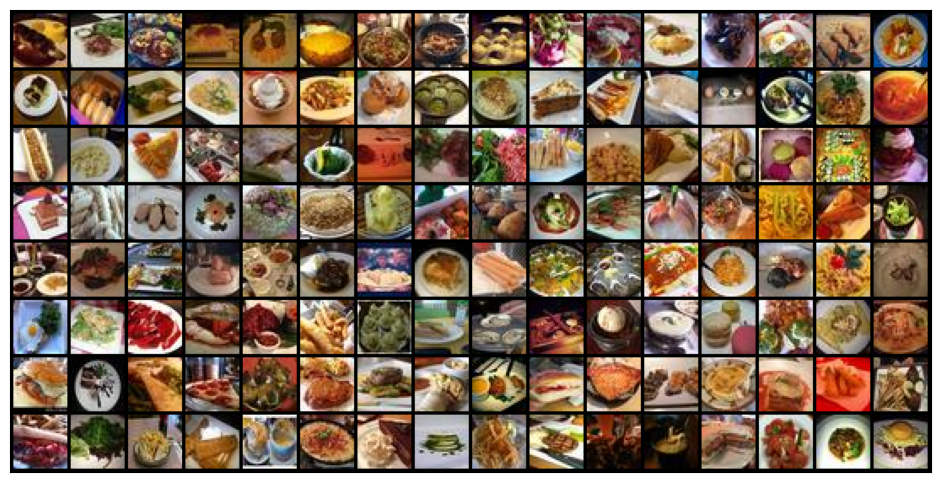

In [20]:
show_batch(train_dl)

In [21]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [22]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [25]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [26]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [27]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [28]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [29]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0220, -0.0063,  0.0388, -0.0015,  0.0248,  0.0448,  0.0117, -0.0141,
         0.0066, -0.0303], grad_fn=<SelectBackward0>)


In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
device = get_default_device()
device

device(type='cpu')

In [32]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [34]:
model = to_device(Cifar10CnnModel(), device)

In [35]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    for batch_idx, (images, labels) in enumerate(val_loader):
        # Print labels to identify the problematic samples
        print(f"Batch {batch_idx} - Labels: {labels}")

        # You can also print out information about the data samples (e.g., image shapes)
        print(f"Batch {batch_idx} - Image shapes: {images.shape}")

        out = model(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)

        # Print out loss and accuracy for each batch
        print(f"Batch {batch_idx} - Loss: {loss.item()}, Accuracy: {acc.item()}")

    # Calculate and print overall validation metrics
    overall_accuracy = calculate_overall_accuracy(model, val_loader)
    overall_loss = calculate_overall_loss(model, val_loader)
    
    print(f"Overall Validation Accuracy: {overall_accuracy}")
    print(f"Overall Validation Loss: {overall_loss}")


In [36]:
evaluate(model, val_dl)

Batch 0 - Labels: tensor([ 96,  74,  28,  43,  61,  55,  12,  57,  24,  73,  86,  79,  76,  52,
         63,  46,  54,  10,  47,  51,  58,  81,  68,  93,  45,  32,  90,  54,
         16,  60,   1,  87,  23,  74,  35, 100,  55,  10,  12,  53,  15,  78,
         68,  94,  38,  96,  89,   8,   1,  13,  15,  30,  34,  14,  24,   5,
         65,  34,  27,  12,  17,   9,  80,  25,  26,  69,   5,  88,  10,  62,
         92,  96,  80,  70,  45,  38,   2,  77,  55,  59,  13,  80,  49,  20,
         29,  53,  49,  36,   9,  13,  67,   3,  37,  32,  28,  65,  29, 100,
         74,  19,  83,  63,  28,  50,   2,  56,  63,  90, 100,  43,  64,  93,
         12,  37,  50,  88,  47,  44,  45,   9,  56,  33,  93,  93,  60,  70,
         78,   2,  76,  16,  59,  47,  37,  39,  18,   4,  39,  36, 100,  86,
         95,  76,  19,  13,  58,  60,  43,  45,  92,  55,  16,  21,   7,  59,
         86,  11,  28,  28,  36,  94,  27,  55,   8,  14,  15,  36,  57,  99,
         52,  32,  58,   4,  24,  57,  28,  18

IndexError: Target 96 is out of bounds.

In [38]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [39]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

IndexError: Target 96 is out of bounds.